In [2]:
import open3d as o3d
import numpy as np
import  matplotlib.pyplot as plt

In [3]:
#Read in data
color_raw = o3d.io.read_image("/Users/davidschaupp/Documents/GitHub/Vision/Open3D/test_data/RGBD/color/00000.jpg")
depth_raw = o3d.io.read_image("/Users/davidschaupp/Documents/GitHub/Vision/Open3D/test_data/RGBD/depth/00000.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


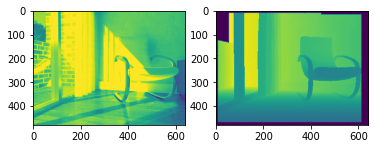

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.imshow(rgbd_image.depth)
plt.show()

In [6]:
#Create Point Cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,
                                                     o3d.camera.PinholeCameraIntrinsic(
                                                         o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

#Flip point cloud - otherwise it is upside down
pcd.transform([[1,0,0,0], [0,-1,0,0], [0,0,-1,0], [0,0,0,1]])
o3d.visualization.draw_geometries([pcd])